In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from luwiji.recommendation_system import illustration

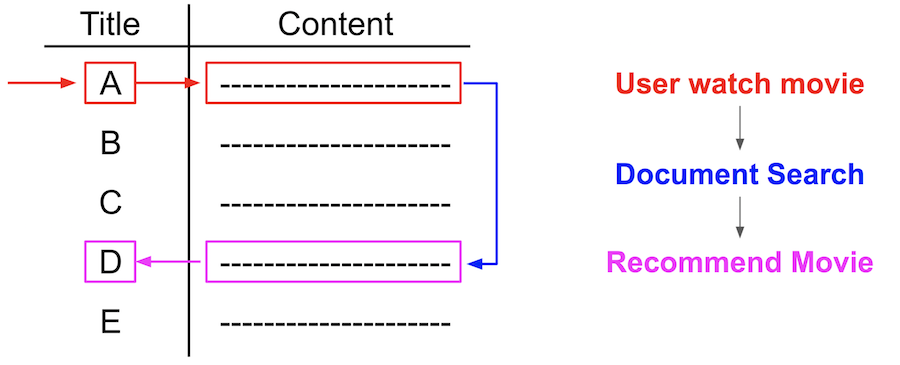

In [3]:
illustration.content_based

# Content = Movie's Synopsis / Overview

In [4]:
df = pd.read_csv('data/content_by_synopsis.csv')
df.head()

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...


## Encode All Sysnopsis menjadi bank

In [6]:
bow = CountVectorizer(stop_words='english', tokenizer=word_tokenize)

In [7]:
bank = bow.fit_transform(df.overview)

/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Step 1: Encode What user watch

In [8]:
idx = 0

In [9]:
content = df.loc[idx, 'overview']

In [10]:
content

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [11]:
code = bow.transform([content])

# Step 2 : Document Search

In [13]:
from sklearn.metrics.pairwise import cosine_distances

In [14]:
dist = cosine_distances(code, bank)

In [18]:
rec_idx = dist.argsort()[0, 1:11]
rec_idx

array([14706,  2945,  9984, 36827, 40606, 13404, 22084, 14078,  6172,
       27006])

# Step 3 : Recommend

In [19]:
df.loc[rec_idx]

,title,overview
14706,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven..."
2945,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy..."
9984,The 40 Year Old Virgin,Andy Stitzer has a pleasant life with a nice a...
36827,Wabash Avenue,Andy Clark discovers he was cheated out of a h...
40606,Stasis,After a night out of partying and left behind ...
13404,The Gang's All Here,"Playboy Andy Mason, on leave from the army, ro..."
22084,The Pied Piper,"Greed, corruption, ignorance, and disease. Mid..."
14078,A Matter of Dignity,"During one of her parents many parties, Chloe ..."
6172,The Courtship of Eddie's Father,The film that started the classic TV series. A...
27006,Superdome,"It's Superbowl. And there's a lot of drama, on..."


# ML Enginering: Sum them all up

In [25]:
class RecommenderSystem:
    def __init__(self, data, content_col):
        self.df = pd.read_csv(data)
        self.content_col = content_col
        self.encoder = None
        self.bank = None
    def fit(self):
        self.encoder = CountVectorizer(stop_words='english', tokenizer=word_tokenize)
        self.bank = bow.fit_transform(self.df[self.content_col])
    def recommend(self, idx, topk=10):
        content = df.loc[idx, self.content_col]
        code = bow.transform([content])
        dist = cosine_distances(code, self.bank)
        rec_idx = dist.argsort()[0, 1:(topk+1)]
        return self.df.loc[rec_idx]

In [22]:
recsys = RecommenderSystem('data/content_by_synopsis.csv', content_col='overview')

In [23]:
recsys.fit()

/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
recsys.recommend(2, topk=10)

,title,overview
33869,Spoon,"Years ago, Lepel's parents left an hot air bal..."
7842,My Voyage to Italy,"""I saw these movies. They had a powerful effec..."
23618,Altman,Maverick. Auteur. Rebel. Innovator. Storytelle...
29031,Dog Star Man: Part I,"From a murky landscape, a wooded mountain emer..."
8856,Wishful Thinking,A story told from three angles. Max meets Eliz...
4478,Tap,Max Washington has just been released from pri...
19833,The Hangover Part III,"This time, there's no wedding. No bachelor par..."
10459,Tony Takitani,Tony Takitani had a solitary childhood. Being ...
11847,I Don't Want to Sleep Alone,Forest fires burn in Sumatra; a smoke covers K...
3343,The End of Violence,Mike Max is a Hollywood producer who became po...


# Content = Multiple Information = Metadata Soup

In [27]:
df = pd.read_csv('data/content_by_multiple.csv')
df.head()

,title,genres,cast,keywords,director,metadata
0,Toy Story,animation comedy family,tom_hanks tim_allen don_rickles,jealousy toy boy,john_lasseter,animation comedy family tom_hanks tim_allen do...
1,Jumanji,adventure fantasy family,robin_williams jonathan_hyde kirsten_dunst,board_game disappearance based_on_children's_book,joe_johnston,adventure fantasy family robin_williams jonath...
2,Grumpier Old Men,romance comedy,walter_matthau jack_lemmon ann-margret,fishing best_friend duringcreditsstinger,howard_deutch,romance comedy walter_matthau jack_lemmon ann-...
3,Waiting to Exhale,comedy drama romance,whitney_houston angela_bassett loretta_devine,based_on_novel interracial_relationship single...,forest_whitaker,comedy drama romance whitney_houston angela_ba...
4,Father of the Bride Part II,comedy,steve_martin diane_keaton martin_short,baby midlife_crisis confidence,charles_shyer,comedy steve_martin diane_keaton martin_short ...


In [28]:
recsys = RecommenderSystem("data/content_by_multiple.csv", content_col='metadata')
recsys.fit()

/home/zaens/miniconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
recsys.recommend(0)

,title,genres,cast,keywords,director,metadata
14771,Toy Story 3,animation family comedy,tom_hanks tim_allen ned_beatty,hostage college toy,lee_unkrich,animation family comedy tom_hanks tim_allen ne...
2963,Toy Story 2,animation comedy family,tom_hanks tim_allen joan_cusack,museum prosecution identity_crisis,john_lasseter,animation comedy family tom_hanks tim_allen jo...
24390,The Legend of Mor'du,animation family,tom_hanks tim_allen joan_cusack,toy short toy_story,steve_purcell,animation family tom_hanks tim_allen joan_cusa...
3273,Creature Comforts,animation comedy family,NaN,animation,nick_park,animation comedy family animation nick_park
34722,Open Season: Scared Silly,animation comedy family,NaN,NaN,dee_hibbert-jones,animation comedy family dee_hibbert-jones
25917,A Flintstones Christmas Carol,animation comedy family,NaN,NaN,rein_raamat,animation comedy family rein_raamat
41974,Banana,animation comedy family,NaN,NaN,adam_foulkes,animation comedy family adam_foulkes
29030,Tom and Jerry: Shiver Me Whiskers,animation comedy family,pablo_francisco,NaN,NaN,animation comedy family pablo_francisco
25857,"I Want a Dog for Christmas, Charlie Brown",animation comedy family,NaN,NaN,dony_permedi,animation comedy family dony_permedi
39123,"What's Opera, Doc?",animation comedy,NaN,NaN,NaN,animation comedy
